In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
transaction=pd.read_csv('digital_wallet_transactions.csv')


In [3]:
transaction.head(2)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban


In [4]:
transaction.shape

(5000, 16)

# Digital Wallet Transactions Dataset

## Overview
This dataset simulates transactions from a digital wallet platform similar to popular services like PayTm in India or Khalti in Nepal. It contains 5000 synthetic records of various financial transactions across multiple categories, providing a rich source for analysis of digital payment behaviors and trends.

## Dataset Description
The dataset includes the following features:

- **idx**: Unique index for each record
- **transaction_id**: Unique identifier for each transaction (UUID)
- **user_id**: Unique identifier for each user
- **transaction_date**: Date and time of the transaction
- **product_category**: Category of the product or service
- **product_name**: Specific product or service name
- **merchant_name**: Name of the merchant or service provider
- **product_amount**: Transaction amount in local currency
- **transaction_fee**: Fee charged for the transaction
- **cashback**: Cashback amount received for the transaction
- **loyalty_points**: Loyalty points earned from the transaction
- **payment_method**: Method used for payment
- **transaction_status**: Status of the transaction (Successful, Failed, Pending)
- **merchant_id**: Unique identifier for each merchant
- **device_type**: Type of device used for the transaction
- **location**: Broad location category of the transaction

## Key Features

- Realistic product and service names across various categories
- Dynamic transaction dates spanning the last year
- Variety of payment methods and transaction statuses
- Inclusion of cashback and loyalty points to reflect modern digital wallet features

## Potential Use Cases

- Analyzing spending patterns across different product categories
- Studying the effectiveness of cashback and loyalty programs
- Investigating the relationship between payment methods and transaction success rates
- Exploring seasonal trends in digital wallet usage
- Developing fraud detection models based on transaction patterns
- Segmenting users based on their spending behavior
- Analyzing the popularity of different merchants and services

## Notes

This is a synthetic dataset created for educational and analytical purposes.
While it aims to mimic real-world patterns, it does not represent actual transactions or real individuals.
The dataset can be used for various data science projects, including but not limited to exploratory data analysis, machine learning model development, and data visualization exercises.

# Insight Dataset

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

In [6]:
transaction.drop(columns=['idx'],inplace=True)

In [7]:
dataset=pd.DataFrame({'dtype':transaction.dtypes,'missing':transaction.isnull().sum(),'duplicate':transaction.duplicated().sum(),'unique':transaction.nunique()})

In [8]:
dataset

,dtype,missing,duplicate,unique
transaction_id,object,0,0,5000
user_id,object,0,0,3932
transaction_date,object,0,0,4978
product_category,object,0,0,20
product_name,object,0,0,100
merchant_name,object,0,0,97
product_amount,float64,0,0,4990
transaction_fee,float64,0,0,3175
cashback,float64,0,0,3959
loyalty_points,int64,0,0,995


In [9]:
dataset.sort_values(by='unique',ascending=False)

,dtype,missing,duplicate,unique
transaction_id,object,0,0,5000
product_amount,float64,0,0,4990
transaction_date,object,0,0,4978
cashback,float64,0,0,3959
user_id,object,0,0,3932
transaction_fee,float64,0,0,3175
loyalty_points,int64,0,0,995
merchant_id,object,0,0,987
product_name,object,0,0,100
merchant_name,object,0,0,97


In [10]:
transaction.describe(include=['object'])

,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,payment_method,transaction_status,merchant_id,device_type,location
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,3932,4978,20,100,97,5,3,987,3,3
top,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05939,2024-06-20 11:13,Streaming Service,Python Programming Course,Airbnb,Bank Transfer,Successful,MERCH_0376,Android,Urban
freq,1,4,2,299,80,106,1045,4755,14,2995,3485


In [11]:
transaction.describe(include=['int64','float64'])

,product_amount,transaction_fee,cashback,loyalty_points
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,4957.502722,25.188874,50.658782,498.790400
std,2885.034160,14.535298,28.522467,288.962434
min,10.090000,0.010000,0.000000,0.000000
25%,2453.977500,12.665000,26.495000,246.000000
50%,4943.685000,25.070000,51.390000,504.000000
75%,7444.815000,37.947500,75.067500,749.000000
max,9996.950000,49.990000,100.000000,999.000000


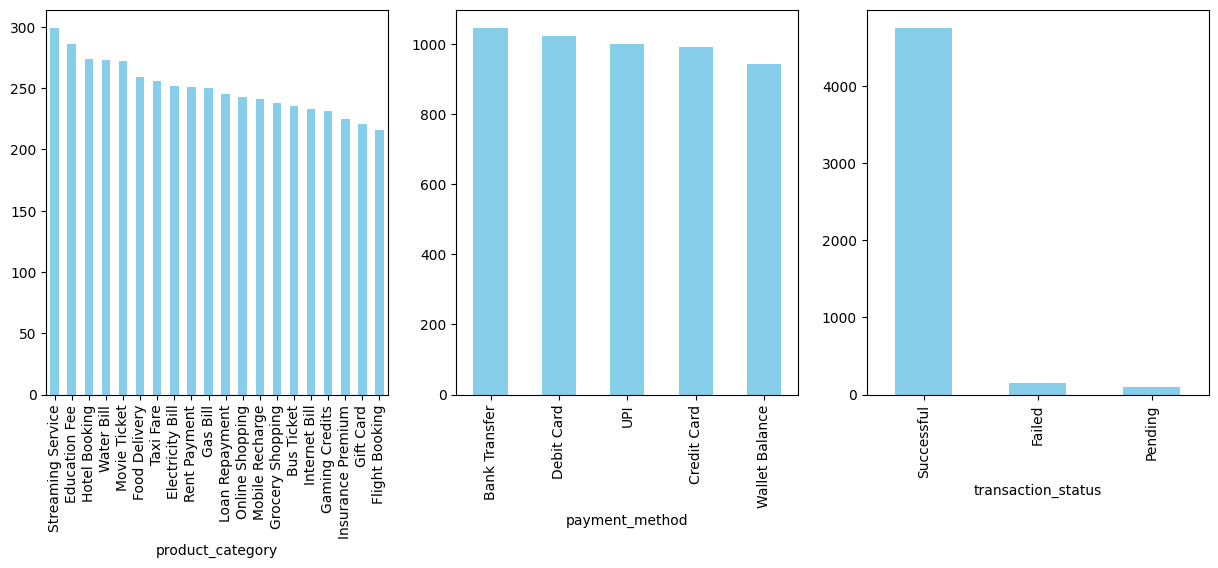

In [12]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
transaction['product_category'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue',ax=ax[0])
transaction['payment_method'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue',ax=ax[1])
transaction['transaction_status'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue',ax=ax[2])
plt.show()

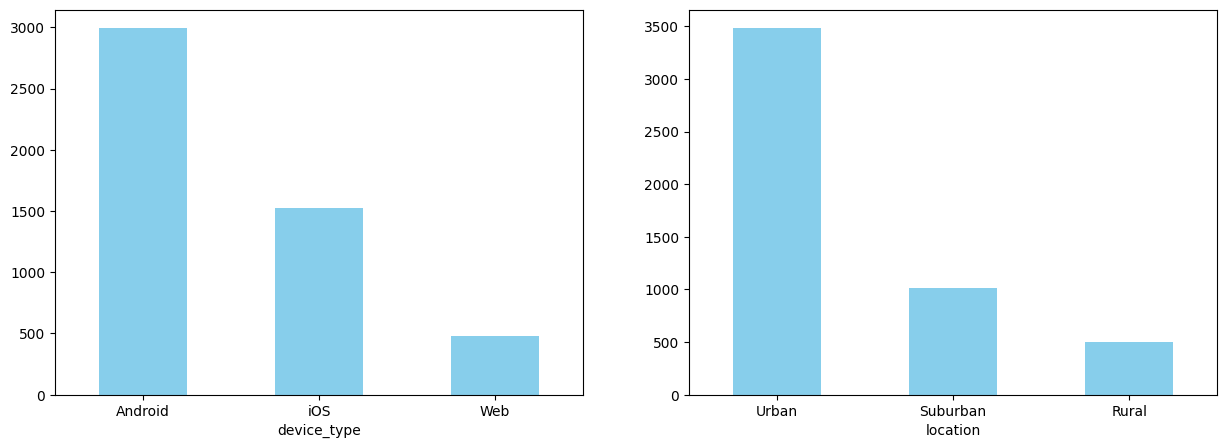

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
transaction['device_type'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue',ax=ax[0])
transaction['location'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue',ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=0)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=0)
plt.show()


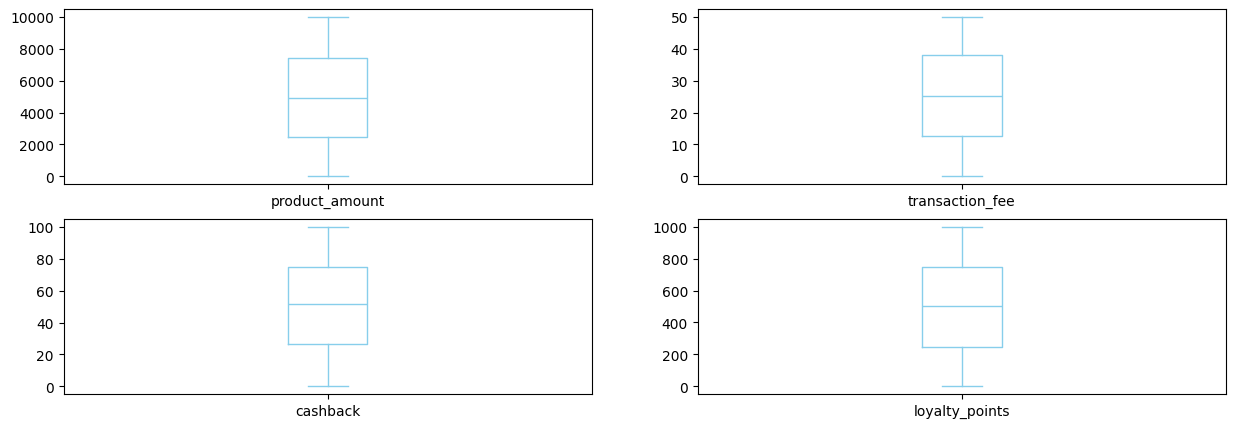

In [14]:
fig,ax=plt.subplots(2,2,figsize=(15,5))
transaction['product_amount'].plot(kind='box',color='skyblue',ax=ax[0,0])
transaction['transaction_fee'].plot(kind='box',color='skyblue',ax=ax[0,1])
transaction['cashback'].plot(kind='box',color='skyblue',ax=ax[1,0])
transaction['loyalty_points'].plot(kind='box',color='skyblue',ax=ax[1,1])
plt.show()

In [15]:
transaction['date']=pd.to_datetime(transaction['transaction_date']).dt.date
transaction['time']=pd.to_datetime(transaction['transaction_date']).dt.time


In [16]:
transaction.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'date', 'time'],
      dtype='object')

In [17]:
transaction.loc[1]

transaction_id        a903ed9f-eb84-47e7-b8aa-fd1786c919cf
user_id                                         USER_07204
transaction_date                          2023-08-19 04:37
product_category                                  Gas Bill
product_name                     Commercial Gas Connection
merchant_name                                    Adani Gas
product_amount                                      1495.4
transaction_fee                                      28.19
cashback                                             89.99
loyalty_points                                         182
payment_method                                         UPI
transaction_status                              Successful
merchant_id                                     MERCH_0163
device_type                                            iOS
location                                             Urban
date                                            2023-08-19
time                                              04:37:

In [18]:
x=1495.4 + 28.19 - 89.99
x

1433.6000000000001

In [19]:
transaction.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'date', 'time'],
      dtype='object')

## Product Insights

In [20]:
pd.pivot_table(transaction,index='product_category',values=['product_amount','transaction_fee','cashback','loyalty_points'],aggfunc='sum').sort_values(by='product_amount',ascending=False) 

,cashback,loyalty_points,product_amount,transaction_fee
product_category,,,,
Streaming Service,15352.11,154187,1462461.66,7753.90
Water Bill,13820.73,137217,1400668.85,6582.45
Gas Bill,12182.66,119866,1361519.80,6494.41
Education Fee,14379.52,135073,1349321.77,7449.83
Movie Ticket,13814.25,127701,1337399.89,6169.85
Hotel Booking,13640.77,138772,1319603.90,6876.42
Food Delivery,13578.41,130077,1317106.21,6586.77
Taxi Fare,13251.58,131527,1306566.24,6622.40
Rent Payment,12995.94,126527,1258263.69,6284.75


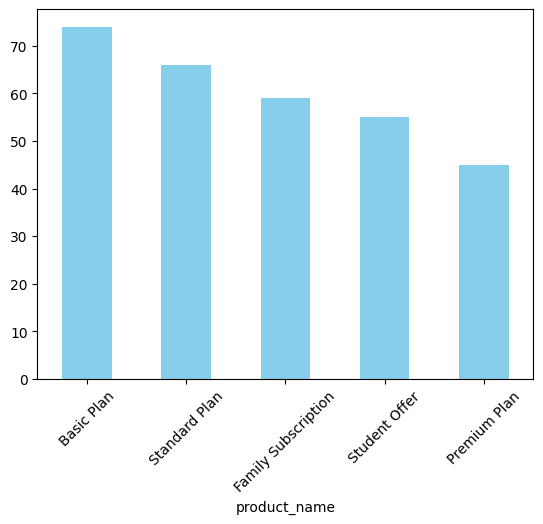

In [21]:
transaction[transaction['product_category']=='Streaming Service']['product_name'].value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue')  
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='product_name'>

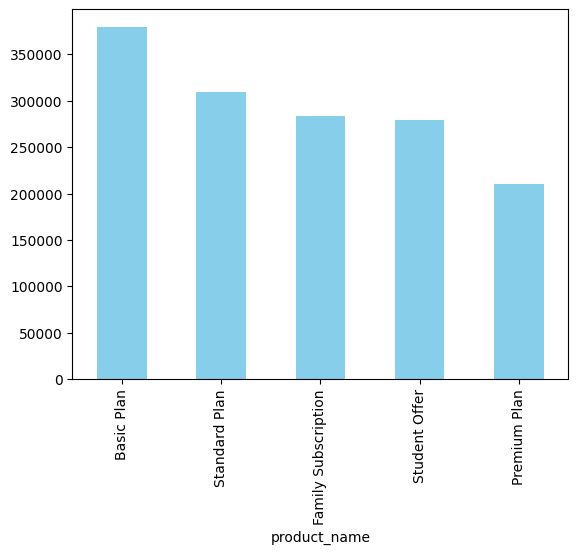

In [22]:
transaction[transaction['product_category']=='Streaming Service'].groupby('product_name')['product_amount'].sum().sort_values(ascending=False).plot(kind='bar',color='skyblue')

### Transaction Fee

<Axes: xlabel='product_category'>

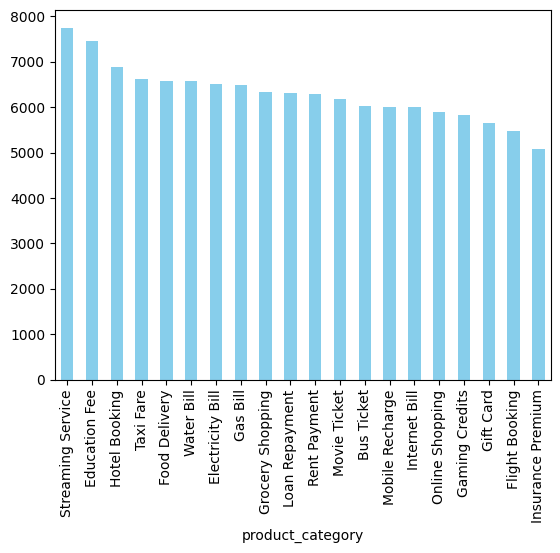

In [23]:
transaction.groupby('product_category')['transaction_fee'].sum().sort_values(ascending=False).plot(kind='bar',color='skyblue')

In [24]:
transaction.groupby('product_name')['transaction_fee'].sum().sort_values(ascending=False).head(5)

product_name
Python Programming Course    2106.96
Basic Plan                   1978.55
Commercial Property          1681.90
MBA Entrance Prep            1661.84
Standard Plan                1650.61
Name: transaction_fee, dtype: float64

### loyalty_points

<Axes: xlabel='product_category'>

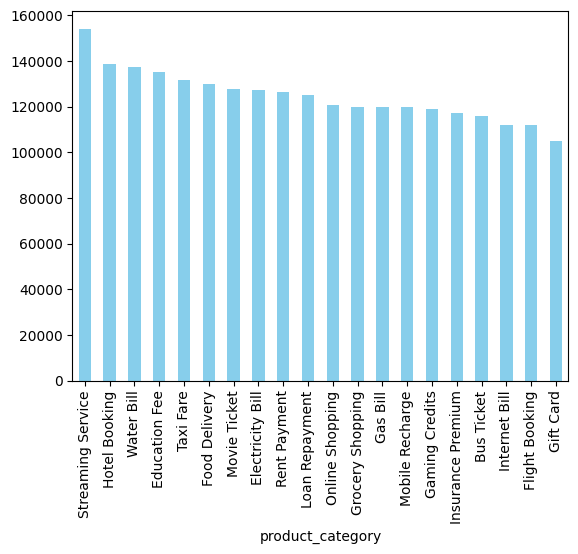

In [25]:
transaction.groupby('product_category')['loyalty_points'].sum().sort_values(ascending=False).plot(kind='bar',color='skyblue')

In [26]:
transaction.groupby('product_name')['loyalty_points'].sum().sort_values(ascending=False).head(5)

product_name
Python Programming Course    35783
Standard Plan                34567
Basic Plan                   33708
Vegetable Biryani            31817
Student Offer                31743
Name: loyalty_points, dtype: int64

In [27]:
transaction.groupby('product_name')['loyalty_points'].sum().sort_values(ascending=True).head(5)

product_name
Rs. 1000 Shopping Voucher    16372
Outstation Trip              17039
Domestic LPG Cylinder        17797
Steel Toe Shoes              18586
Premium Skin                 19003
Name: loyalty_points, dtype: int64

### cashback

In [28]:
transaction.groupby('product_name')['cashback'].sum().sort_values(ascending=True).head(5)

product_name
Pune to Goa                 1788.68
Term Life Policy            1910.52
Pizza Margherita            1931.18
Mixed Fruit Jam             1968.38
Rs. 250 Coffee Shop Card    1972.92
Name: cashback, dtype: float64

In [29]:
transaction.groupby('product_name')['cashback'].sum().sort_values(ascending=True).tail(5)

product_name
3 Idiots                     3396.59
Vegetable Biryani            3592.30
Basic Plan                   3638.88
Standard Plan                3703.20
Python Programming Course    3962.88
Name: cashback, dtype: float64

### payment_method

In [30]:
transaction.groupby('payment_method')['product_category'].value_counts().sort_values(ascending=False).tail(5)

payment_method  product_category 
Debit Card      Flight Booking       39
                Insurance Premium    39
Wallet Balance  Gift Card            38
Debit Card      Taxi Fare            37
Bank Transfer   Mobile Recharge      31
Name: count, dtype: int64

### Location

In [31]:
transaction.groupby('location')['product_category'].value_counts().sort_values(ascending=False).head(10)

location  product_category 
Urban     Streaming Service    204
          Education Fee        200
          Movie Ticket         190
          Water Bill           188
          Hotel Booking        187
          Mobile Recharge      182
          Electricity Bill     181
          Food Delivery        180
          Gas Bill             177
          Grocery Shopping     174
Name: count, dtype: int64

In [32]:
transaction.groupby('location')['product_category'].value_counts().sort_values(ascending=False).tail(10)

location  product_category
Rural     Electricity Bill    22
          Gaming Credits      22
          Gas Bill            21
          Mobile Recharge     21
          Grocery Shopping    21
          Water Bill          21
          Online Shopping     20
          Bus Ticket          20
          Internet Bill       20
          Food Delivery       20
Name: count, dtype: int64

### transaction_status

In [33]:
pd.pivot_table(transaction,index='product_category',columns='transaction_status',values='transaction_id',aggfunc='count')

transaction_status,Failed,Pending,Successful
product_category,,,
Bus Ticket,5.0,3.0,227.0
Education Fee,10.0,NaN,276.0
Electricity Bill,10.0,2.0,240.0
Flight Booking,6.0,3.0,207.0
Food Delivery,6.0,4.0,249.0
Gaming Credits,11.0,6.0,214.0
Gas Bill,5.0,6.0,239.0
Gift Card,5.0,8.0,208.0
Grocery Shopping,9.0,6.0,223.0


In [34]:
transaction.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'date', 'time'],
      dtype='object')

## Merchant

In [35]:
transaction.groupby('merchant_name')['transaction_id'].count().sort_values(ascending=False).head(5)

merchant_name
Airbnb        106
Flipkart      102
MakeMyTrip     85
Netflix        72
Unacademy      69
Name: transaction_id, dtype: int64

In [36]:
transaction.groupby('merchant_name')['product_amount'].sum().sort_values(ascending=False).head(5)

merchant_name
Airbnb                    550248.40
Flipkart                  458472.89
MakeMyTrip                438496.77
Bangalore Water Supply    337482.55
Netflix                   335355.47
Name: product_amount, dtype: float64

In [37]:
transaction.groupby('merchant_name')['product_amount'].sum().sort_values(ascending=False).tail(5)

merchant_name
Minecraft           186546.32
Amazon Pantry       186534.34
Lifestyle           160096.95
Vodafone            159355.56
ICICI Prudential    140740.26
Name: product_amount, dtype: float64

In [38]:
transaction.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'date', 'time'],
      dtype='object')

In [45]:
transaction.groupby('merchant_name')['transaction_fee'].sum().sort_values(ascending=False).head(5)

merchant_name
Flipkart      2544.69
Airbnb        2407.78
MakeMyTrip    2002.84
Netflix       1867.54
Hotstar       1772.92
Name: transaction_fee, dtype: float64

In [46]:
transaction.groupby('merchant_name')['transaction_fee'].sum().sort_values(ascending=False).tail(5)

merchant_name
PVR Cinemas    916.47
RedBus         899.37
Zomato         837.99
Vodafone       773.21
HDFC Life      767.41
Name: transaction_fee, dtype: float64